In [5]:
'''import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandarallel import pandarallel

# Initialization
pandarallel.initialize(progress_bar=True)

df = pd.read_csv("emails_content.csv")
# check for null value
df.isnull().sum()
#Pre-processing
tokenizer = RegexpTokenizer("[A-Za-z]+")
df.content[0]
tokenizer.tokenize(df.content[0])'''

'import pandas as pd\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport plotly.express as px\nfrom nltk.tokenize import RegexpTokenizer\nfrom nltk.stem.snowball import SnowballStemmer\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.metrics import accuracy_score\nfrom pandarallel import pandarallel\n\n# Initialization\npandarallel.initialize(progress_bar=True)\n\ndf = pd.read_csv("emails_content.csv")\n# check for null value\ndf.isnull().sum()\n#Pre-processing\ntokenizer = RegexpTokenizer("[A-Za-z]+")\ndf.content[0]\ntokenizer.tokenize(df.content[0])'

In [6]:
'''df['text_tokenized'] = df.content.parallel_map(lambda t: tokenizer.tokenize(str(t)))
stemmer = SnowballStemmer("english")
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))'''

'df[\'text_tokenized\'] = df.content.parallel_map(lambda t: tokenizer.tokenize(str(t)))\nstemmer = SnowballStemmer("english")\ndf[\'text_stemmed\'] = df[\'text_tokenized\'].map(lambda l: [stemmer.stem(word) for word in l])\ndf[\'text_sent\'] = df[\'text_stemmed\'].map(lambda l: \' \'.join(l))'

### GPU test

In [3]:
import sys
import numba 
import numpy

print("Python version:", sys.version)
print("Numba version:", numba.__version__)
print("Numpy version:", numpy.__version__)
!nvcc --version

Python version: 3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]
Numba version: 0.56.4
Numpy version: 1.23.4
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
import tensorflow as tf
#tf.config.list_physical_devices('GPU')
#tf.test.is_built_with_cuda()
#tf.test.is_gpu_available(cuda_only=False,min_cuda_compute_capability=None)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


ModuleNotFoundError: No module named 'tensorflow'

In [4]:
from numba import cuda
cuda.cudadrv.libs.test()

Finding nvvm from Conda environment
	located at /home/alex/miniconda3/lib/libnvvm.so.4.0.0
	trying to open library...	ok
Finding cudart from Conda environment
	located at /home/alex/miniconda3/lib/libcudart.so.11.8.89
	trying to open library...	ok
Finding cudadevrt from Conda environment
	located at /home/alex/miniconda3/lib/libcudadevrt.a
Finding libdevice from Conda environment
	trying to open library...	ok


True

### Launching CUDA kernel

In [5]:
from numba import cuda
import numpy as np

@cuda.jit
def cudakernel0(array):
    for i in range(array.size):
        array[i] += 0.5

array = np.array([0, 1], np.float32)
print('Initial array:', array)

print('Kernel launch: cudakernel0[1, 1](array)')
cudakernel0[1, 1](array)

print('Updated array:',array)        

Initial array: [0. 1.]
Kernel launch: cudakernel0[1, 1](array)


/home/alex/miniconda3/lib/python3.9/site-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


CudaSupportError: Error at driver init: Call to cuInit results in CUDA_ERROR_NO_DEVICE (100)

## Prova di Classificazione email

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,email,label
0,Subject: republic royalty 5 / 00\n this deal w...,ham
1,Subject: sap / financials / unify interface co...,ham
2,"Subject: re : good morning\n john ,\n i shall ...",ham
3,Subject: hpl meter # 981459 harris gsf energy ...,ham
4,Subject: well head\n costilla has sent in a ne...,ham
5,Subject: reminder\n hello everyone :\n vince h...,ham
6,Subject: gtv weekly status update\n please fin...,ham
7,Subject: eastrans nomination change effective ...,ham
8,Subject: fw : california capacity report for w...,ham
9,"Subject: dpr delivery time graph\n sally ,\n w...",ham


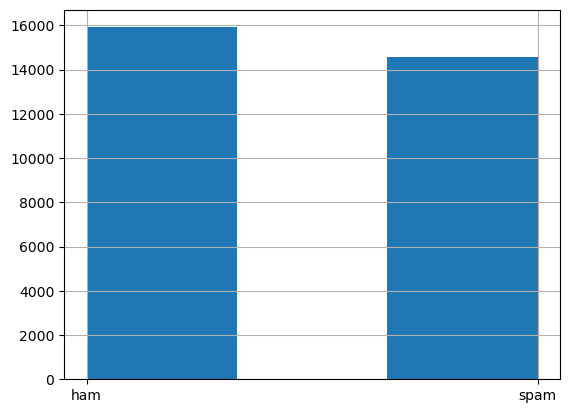

In [3]:
from os import walk
from string import punctuation
from random import shuffle
from collections import Counter

# importing additional libraries

import pandas as pd
import sklearn as sk
import nltk

from pandarallel import pandarallel

# Initialization
pandarallel.initialize(progress_bar=True)

# Read the whole data from the Enron Dataset into a variable allData.

pathwalk = walk(r"enron-spam/")

allHamData, allSpamData = [], []
for root, dr, file in pathwalk:
    if 'ham' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                allHamData.append(" ".join(ip.readlines()))

    elif 'spam' in str(file):
        for obj in file:
            with open(root + '/' + obj, encoding='latin1') as ip:
                allSpamData.append(" ".join(ip.readlines()))
                # remove all redundant data

allHamData = list(set(allHamData))
allSpamData = list(set(allSpamData))
# storing it in a dataframe

hamPlusSpamData = allHamData + allSpamData
labels = ["ham"]*len(allHamData) + ["spam"]*len(allSpamData)

raw_df = pd.DataFrame({"email": hamPlusSpamData,
                       "label": labels})

# get an overview of the data

raw_df.label.hist(bins=3)
raw_df.head(10)

In [4]:
from nltk.tokenize import RegexpTokenizer
# check for null value
raw_df.isnull().sum()
#Pre-processing
tokenizer = RegexpTokenizer("[A-Za-z]+")
raw_df.email[0]
tokenizer.tokenize(raw_df.email[0])

['Subject',
 'republic',
 'royalty',
 'this',
 'deal',
 'was',
 'terminated',
 'by',
 'nelson',
 'ferries',
 'ami',
 'forwarded',
 'by',
 'ami',
 'chokshi',
 'corp',
 'enron',
 'on',
 'am',
 'from',
 'megan',
 'parker',
 'am',
 'to',
 'ami',
 'chokshi',
 'corp',
 'enron',
 'enron',
 'o',
 'neal',
 'd',
 'winfree',
 'hou',
 'ect',
 'ect',
 'cc',
 'subject',
 'republic',
 'royalty',
 'republic',
 'royalty',
 'is',
 'one',
 'of',
 'my',
 'ces',
 'deals',
 'they',
 'sent',
 'me',
 'an',
 'invoice',
 'for',
 'may',
 'production',
 'but',
 'i',
 'do',
 'not',
 'see',
 'a',
 'deal',
 'for',
 'may',
 'does',
 'either',
 'of',
 'you',
 'know',
 'if',
 'this',
 'deal',
 'was',
 'extended',
 'under',
 'a',
 'new',
 'deal',
 'number',
 'megan']

In [5]:
from nltk.stem.snowball import SnowballStemmer
raw_df['text_tokenized'] = raw_df.email.parallel_map(lambda t: tokenizer.tokenize(str(t)))
stemmer = SnowballStemmer("english")
raw_df['text_stemmed'] = raw_df['text_tokenized'].parallel_map(lambda l: [stemmer.stem(word) for word in l])
raw_df['text_sent'] = raw_df['text_stemmed'].parallel_map(lambda l: ' '.join(l))

#Visualizzation

In [6]:
bad_emails = raw_df[raw_df.label == 'spam']
good_emails = raw_df[raw_df.label == 'ham']

#Creating Model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
feature = cv.fit_transform(raw_df.text_sent)
trainX, testX, trainY, testY = train_test_split(feature, raw_df.label)

#Logistic Regression

/home/alex/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9992566681241801
Testing Accuracy : 0.9851783840503673

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.99      0.99      3933
        Good       0.99      0.98      0.98      3691

    accuracy                           0.99      7624
   macro avg       0.99      0.99      0.99      7624
weighted avg       0.99      0.99      0.99      7624


CONFUSION MATRIX


<AxesSubplot:>

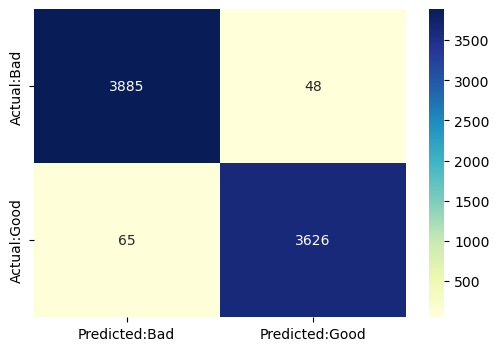

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(trainX,trainY)
lr.score(testX,testY)
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

# Multinomial Naive Bayes

Training Accuracy : 0.9890249234805422
Testing Accuracy : 0.9857030430220357

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      0.99      0.99      3957
        Good       0.98      0.99      0.99      3667

    accuracy                           0.99      7624
   macro avg       0.99      0.99      0.99      7624
weighted avg       0.99      0.99      0.99      7624


CONFUSION MATRIX


<AxesSubplot:>

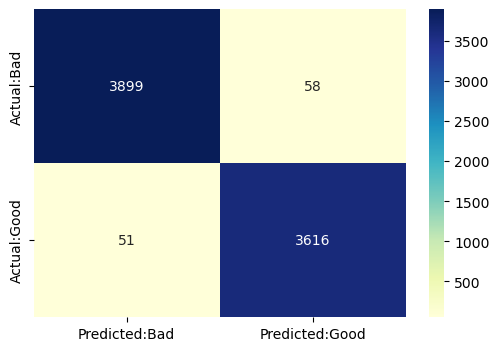

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import pickle

mnb = MultinomialNB()
mnb.fit(trainX,trainY)
mnb.score(testX,testY)
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

#Support Vector Machine

Training Accuracy : 0.99995627459554
Testing Accuracy : 0.9795383001049318

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.98      0.98      3968
        Good       0.98      0.98      0.98      3656

    accuracy                           0.98      7624
   macro avg       0.98      0.98      0.98      7624
weighted avg       0.98      0.98      0.98      7624


CONFUSION MATRIX


<AxesSubplot:>

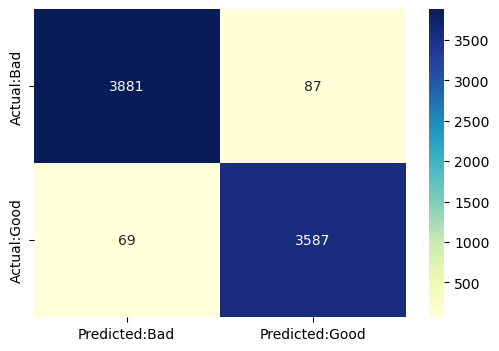

In [11]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
SVC_model = svm.SVC(kernel='linear')
SVC_model.fit(trainX,trainY)

print('Training Accuracy :', SVC_model.score(trainX,trainY))
print('Testing Accuracy :',SVC_model.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(SVC_model.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(SVC_model.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")
